In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [35]:
from IPython.display import Audio
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [36]:
df = pd.read_csv(r"C:\Users\kumar\Documents\Music-Genre-Classification\features_3_sec.csv")
df.head()
df.dtypes


filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [37]:
df=df.drop(axis=1,labels='filename')

In [38]:
df.dtypes

length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var                  float64
mfcc6_mean          

In [39]:
audio_recording = r"C:\Users\kumar\Documents\Music-Genre-Classification\hiphop.00011.wav"

In [40]:
data,sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [41]:
librosa.load(audio_recording,sr=45600)
freq_mat=librosa.stft(data)
print(freq_mat)

[[-4.89691448e+00+0.0000000e+00j -2.86848593e+00+0.0000000e+00j
  -1.21242547e+00+0.0000000e+00j ... -1.26642048e+00+0.0000000e+00j
  -1.46331012e+00+0.0000000e+00j -2.67615557e+00+0.0000000e+00j]
 [ 4.78118086e+00+3.8857415e-01j  5.16919851e-01+1.9448786e+00j
  -3.48788321e-01-3.5733521e-01j ...  1.11382520e+00-7.4868625e-01j
   7.89486945e-01+7.5750721e-01j  8.25253010e-01-1.9909009e+00j]
 [-4.87282562e+00-1.7219769e+00j  5.55978000e-01+2.2200925e+00j
   2.63513327e+00-4.9894479e-01j ... -7.01088428e-01+7.0482618e-01j
  -2.82676816e-01-1.1786430e-01j  2.72230577e+00+1.9220312e+00j]
 ...
 [-1.08461110e-02+2.4844988e-04j  5.60341170e-03-1.4406772e-04j
  -2.99713633e-04-2.2662749e-05j ... -1.35509908e-05+1.4490659e-04j
   6.50437258e-04-2.9100145e-03j -4.75378055e-03+2.2193262e-02j]
 [ 1.06604593e-02-2.8440458e-04j -3.88612563e-04-5.2473862e-03j
   4.91812352e-05+5.7931869e-05j ...  1.00065176e-04-1.5661307e-04j
   2.23241118e-03-2.1219365e-03j -1.45748258e-02-1.7632253e-02j]
 [-1.04977

C:\Users\kumar\AppData\Local\Temp\ipykernel_8680\3576455261.py:3: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(freq_mat, sr=sr, x_axis='time', y_axis='hz')


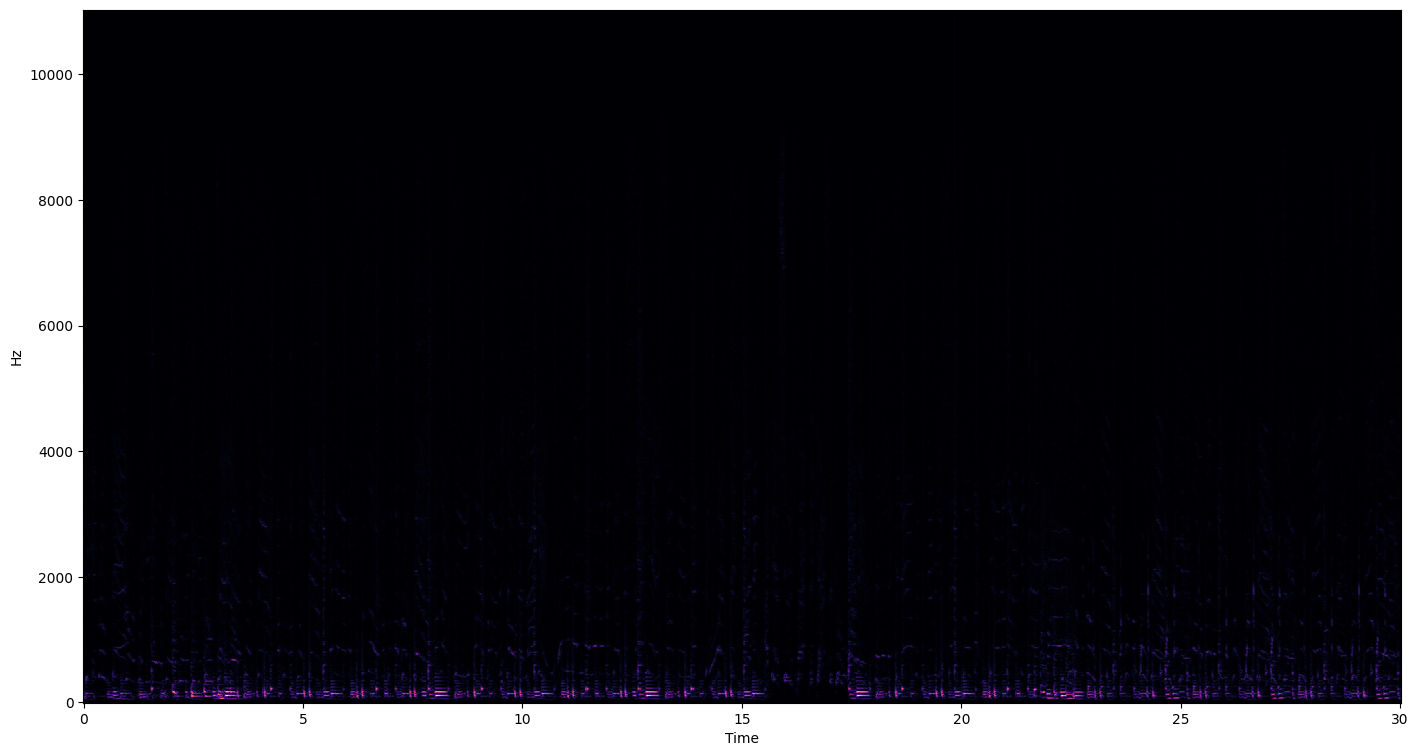

In [42]:
freq_db=librosa.amplitude_to_db(abs(freq_mat))
plt.figure(figsize=(17,9))
librosa.display.specshow(freq_mat, sr=sr, x_axis='time', y_axis='hz')

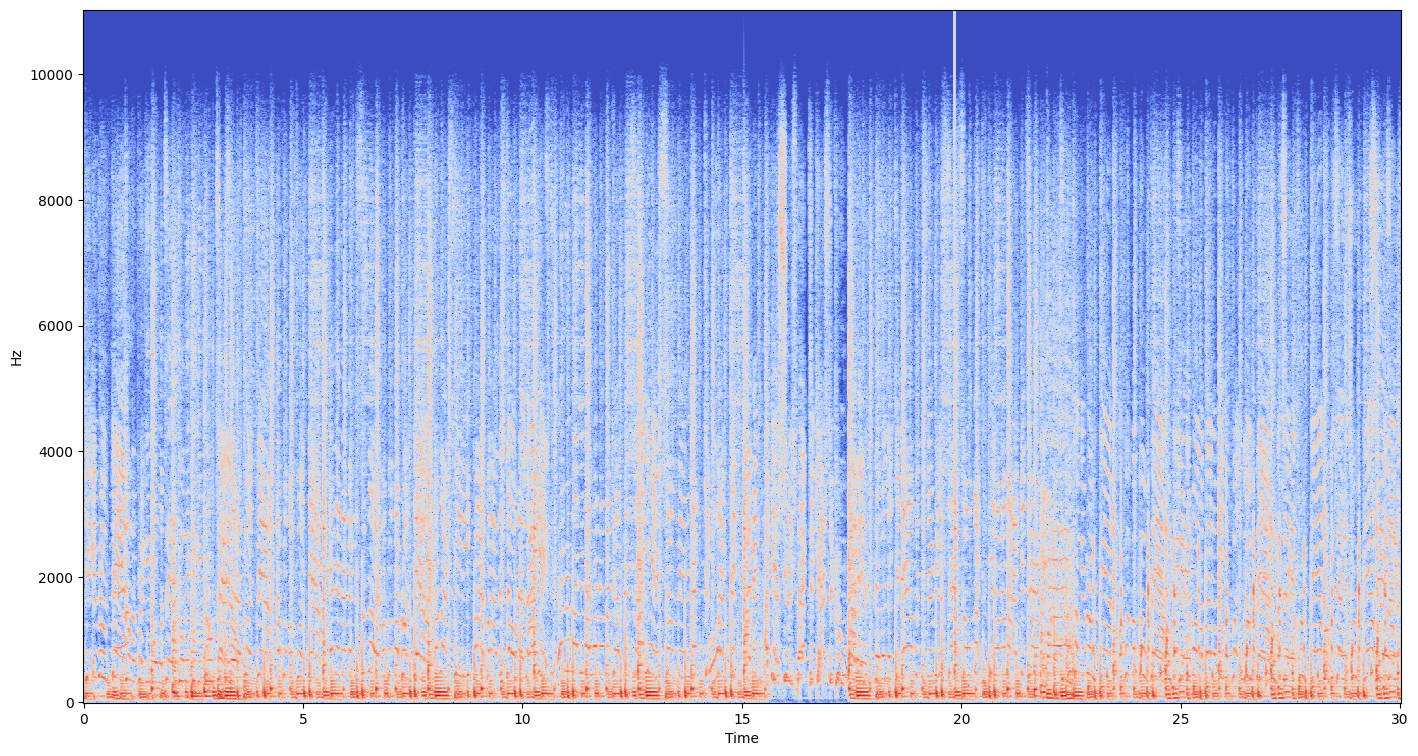

In [43]:
plt.figure(figsize=(17,9))
librosa.display.specshow(freq_db,sr=sr,x_axis='time',y_axis='hz')

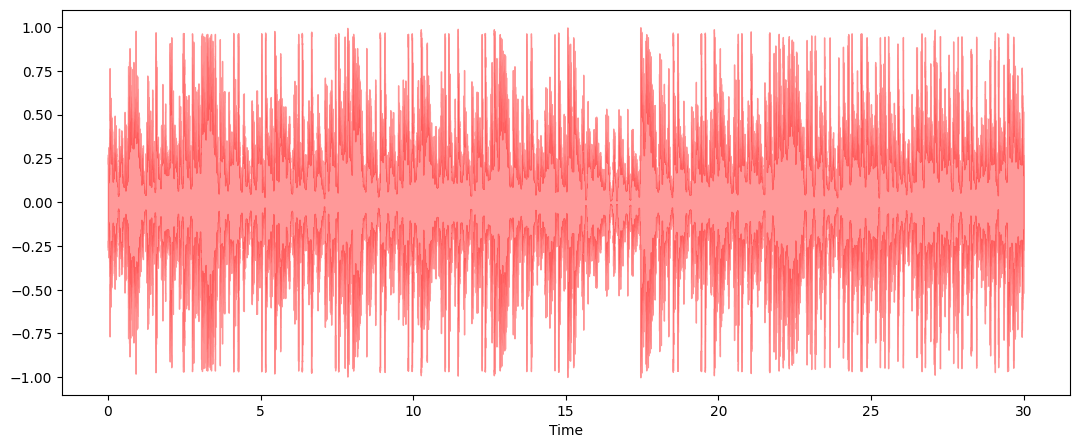

In [44]:
import sklearn.preprocessing as prepr
import librosa.display as ldsp
normalized_data=(data+0.01)/np.max(np.abs(data+0.01))
spectral_rolloff=librosa.feature.spectral_rolloff(y=normalized_data,sr=sr)[0]
plt.figure(figsize=((13,5)))
ldsp.waveshow(normalized_data,sr=sr,alpha=0.4,color="#FF0000")


Text(0, 0.5, 'Amplitude')

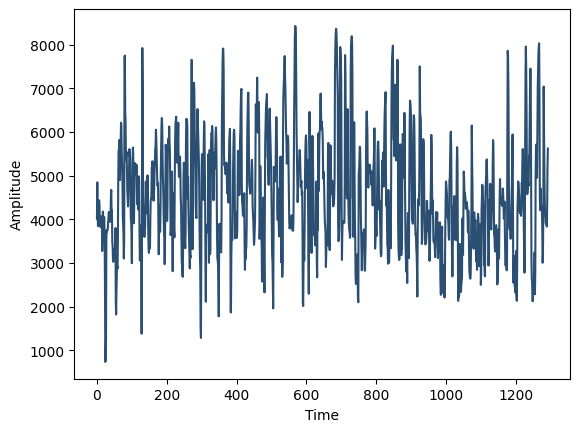

In [45]:
plt.plot(spectral_rolloff,color="#2B4F72")
plt.xlabel("Time")
plt.ylabel("Amplitude")

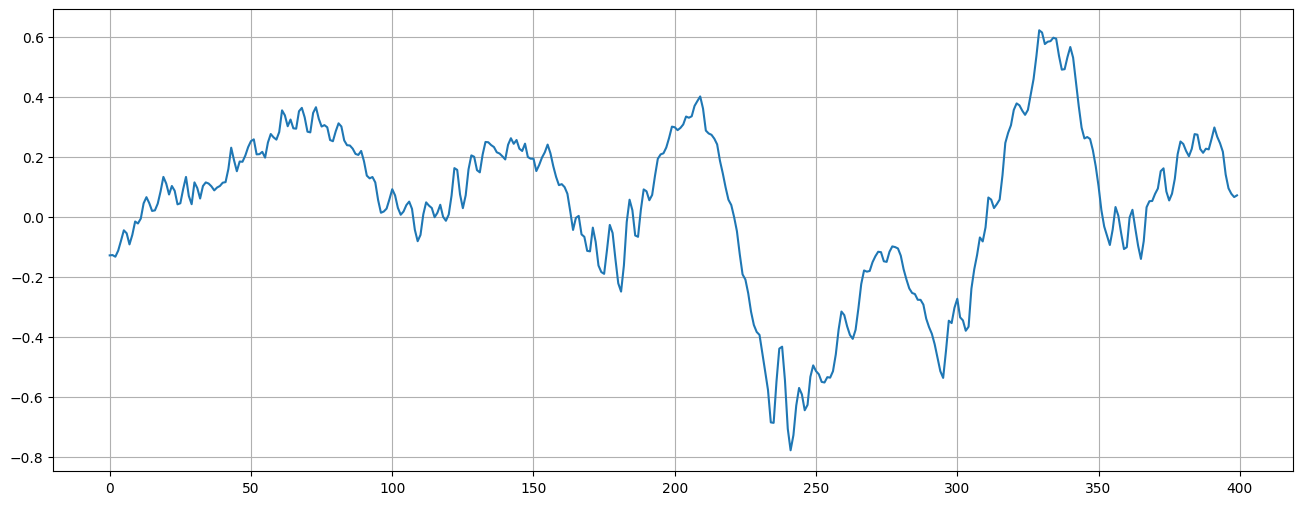

In [46]:
beg=1000
lst=1400
plt.figure(figsize=(16,6))
plt.plot(data[beg:lst])
plt.grid()

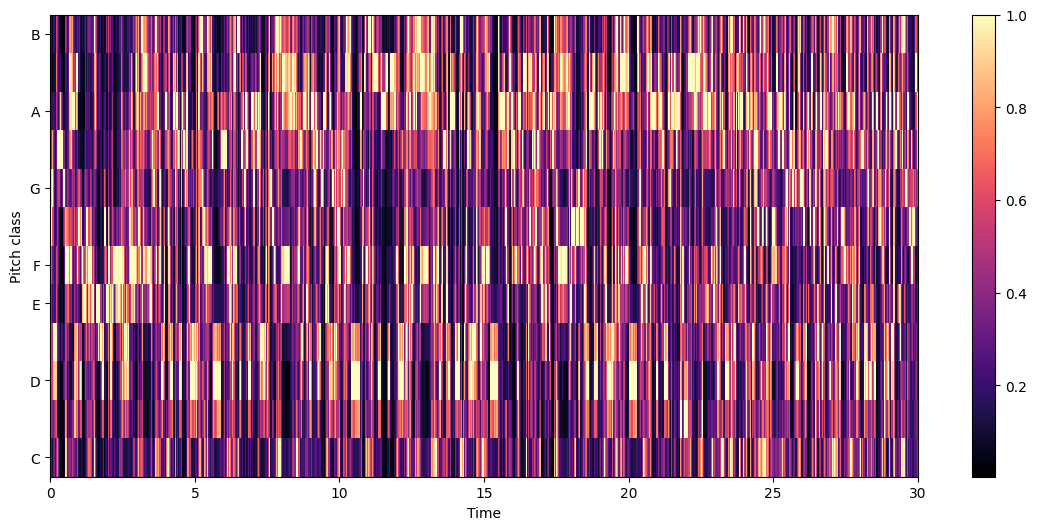

In [47]:
chroma_feat=librosa.feature.chroma_stft(y=data,sr=sr)
plt.figure(figsize=(14,6))
ldsp.specshow(chroma_feat,sr=sr,x_axis='time',y_axis='chroma')
plt.colorbar()
plt.show()

In [48]:
from sklearn.preprocessing import LabelEncoder
list=df.iloc[:,-1]
encoder=LabelEncoder()
y=encoder.fit_transform(list)
print(y)

[0 0 0 ... 9 9 9]


In [49]:
list=df.iloc[:,-1]
print(list)

0       blues
1       blues
2       blues
3       blues
4       blues
        ...  
9985     rock
9986     rock
9987     rock
9988     rock
9989     rock
Name: label, Length: 9990, dtype: object


In [50]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [51]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
feature=np.array(df.iloc[:,:-1],dtype=float)
X=scalar.fit_transform(feature)

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [53]:
len(y_train)

5994

In [54]:
len(y_test)

3996

In [55]:
from keras.models import Sequential
model=keras.models.Sequential([
    keras.layers.Dense(1024,activation='relu',input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256,activation='relu',),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10,activation='softmax'),
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
fit_model=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=40)



Epoch 1/40


47/47 [==============================] - 2s 15ms/step - loss: 1.8887 - accuracy: 0.3015 - val_loss: 1.3606 - val_accuracy: 0.5250
Epoch 2/40
47/47 [==============================] - 1s 13ms/step - loss: 1.4101 - accuracy: 0.4967 - val_loss: 1.0278 - val_accuracy: 0.6446
Epoch 3/40
47/47 [==============================] - 1s 13ms/step - loss: 1.1347 - accuracy: 0.6098 - val_loss: 0.8548 - val_accuracy: 0.7157
Epoch 4/40
47/47 [==============================] - 1s 15ms/step - loss: 0.9654 - accuracy: 0.6808 - val_loss: 0.7533 - val_accuracy: 0.7490
Epoch 5/40
47/47 [==============================] - 1s 16ms/step - loss: 0.8628 - accuracy: 0.7184 - val_loss: 0.6752 - val_accuracy: 0.7778
Epoch 6/40
47/47 [==============================] - 1s 17ms/step - loss: 0.7453 - accuracy: 0.7606 - val_loss: 0.6370 - val_accuracy: 0.7883
Epoch 7/40
47/47 [==============================] - 1s 16ms/step - loss: 0.6715 - accuracy: 0.7788 - val_loss: 0.5850 - val_accuracy: 0.8043
Epoch 8/40
47/47 [======

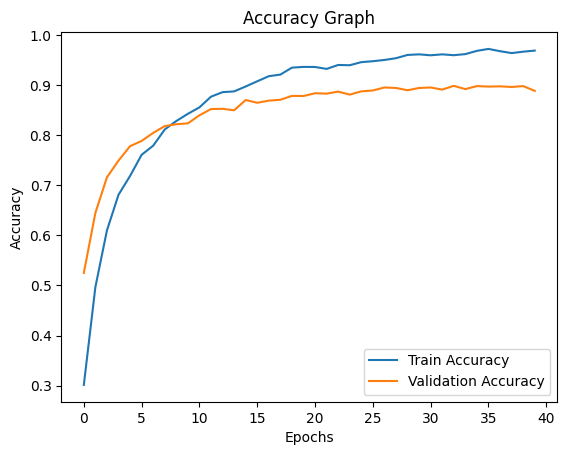

In [56]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'], label='Train Accuracy')
plt.plot(fit_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.show()

In [57]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              60416     
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [58]:
y_pred = model.predict(X_test)


125/125 [==============================] - 0s 2ms/step


In [59]:
from sklearn.metrics import precision_score

y_pred_lab=np.argmax(y_pred, axis=1) 
precision=precision_score(y_test, y_pred_lab,average='macro')


print("Precision come out to be=", precision)

Precision come out to be= 0.8883744368650323


125/125 [==============================] - 0s 2ms/step


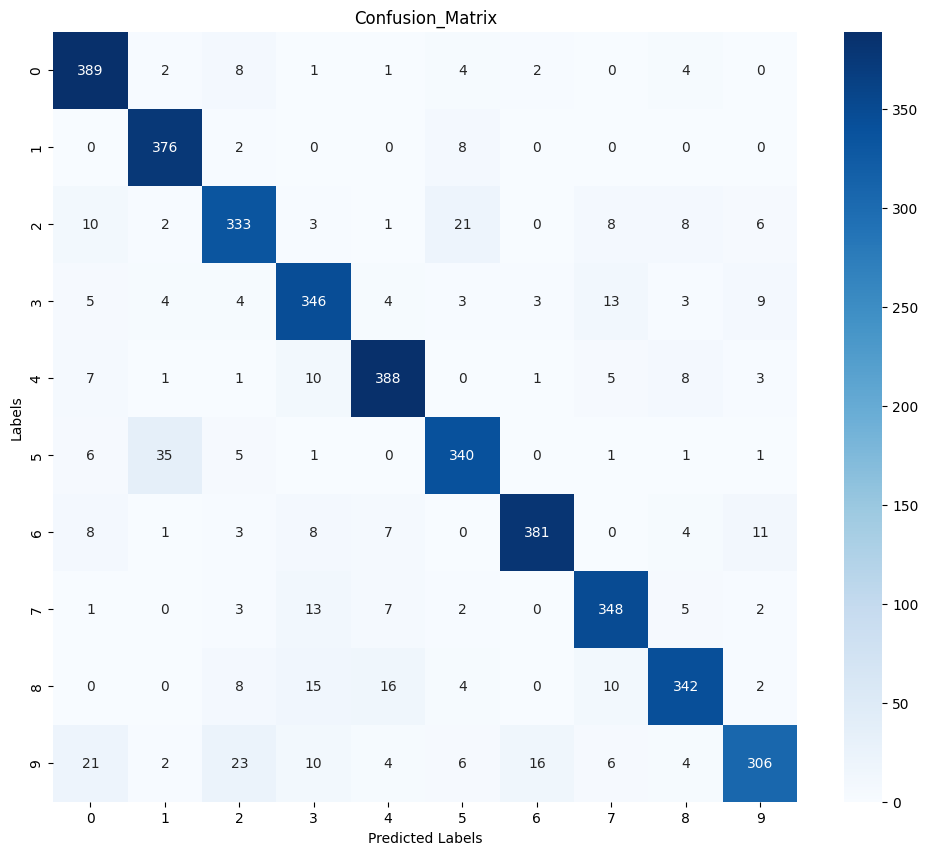

In [60]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion_mat = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Labels')
plt.title('Confusion_Matrix')
plt.show()
